### **Problem Statement:** Predicting quality of wine 

*   **Method:**
  1.   Conducted Exploratory Data Analysis (EDA) to find out correlation of variables to wine quality
  2.   Utilized Machine Learning models to predict wine quality
  3.   Evaluated performance of models and selected best model for deployment

*   **Approach:** Using combination of red and white wine data (Source: UCI Machine Learning Repository)

*   **Metric:** Measure accuracy and f1 score (i.e. precision) of predicted wine quality 
 





### **Step 1:** Import all relevant libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#mounting GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Step 2:** Read dataset obtained from UCI Machine Learning Repository into a dataframe. Then, check and clean up data set.

In [3]:
# obtaining red wine data

url_red = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df_red = pd.read_csv(url_red, sep = ';', header = [0])
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# obtaining white wine data

url_white = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df_white = pd.read_csv(url_white, sep = ';', header = [0])
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
# merging red & white wine data

df = pd.concat([df_red, df_white], axis = "rows")
df.reset_index(drop = True, inplace = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [6]:
# check for missing data

df.isna().sum().sum()

0

### **Step 3:** Perform Exploratory Data Analysis to see correlation between variables and 'quality'.

In [7]:
# checking correlation of variables to quality

df_corr = df.corr()
df_corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

#### Variables that appear to have highest correlation to 'quality' were 'alcohol', 'density' & 'volatile acidity'.

#### Plot pairplot to visualize the distribution and relationship for variables with the highest correlation to 'quality'.


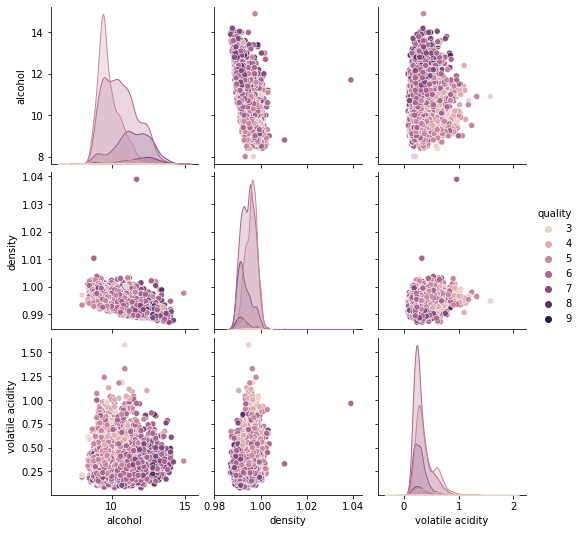

In [8]:
sns.pairplot(df[['quality','alcohol','density','volatile acidity' ]], hue = 'quality')

#### Outliers observed in the pairplot for variables (i.e. 'density' & 'volatile acidity') have been removed, to improve the distribution of data and correlation to 'quality'.

*   Density: removed outliers from dataset where density > 1.01

*   Volatile acidity: removed outliers from data where volatile acidity > 1.0




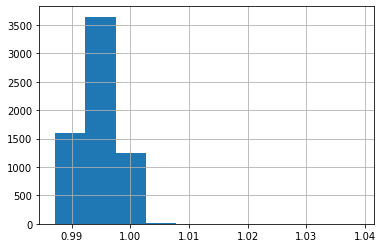

In [9]:
df['density'].hist()

In [10]:
drop_ls = df[df['density'] > 1.01].index
df.drop(index = drop_ls, inplace = True)

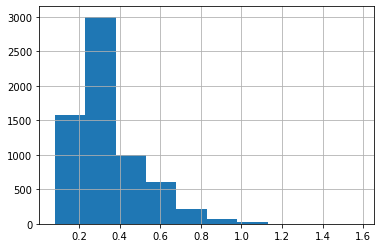

In [11]:
df['volatile acidity'].hist()

In [12]:
drop_ls = df[df['volatile acidity'] > 1].index
df.drop(index = drop_ls, inplace = True)

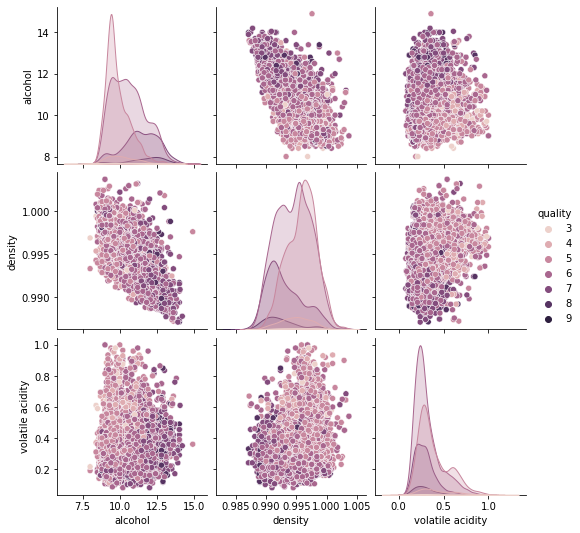

In [13]:
# display pairplot again to see difference/ improvement in distribution and relationship

sns.pairplot(df[['quality','alcohol','density','volatile acidity' ]], hue = 'quality')

In [14]:
# checking for difference/ improvement in correlation of variables to 'quality'

df_corr = df.corr()
df_corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.448674
citric acid             0.078379
free sulfur dioxide     0.050874
sulphates               0.037708
pH                      0.027945
residual sugar         -0.041884
total sulfur dioxide   -0.048242
fixed acidity          -0.076857
chlorides              -0.197707
volatile acidity       -0.252311
density                -0.313693
Name: quality, dtype: float64

#### **Analysis:** Slight improvement observed in correlation after removing the outliers from variables with highest correlation to 'quality'.

### **Step 4:** Using Machine Learning, train model to predict wine quality.

4 different models were being tested out:

1.   LogisticRegression
2.   DecisionTreeClassifier
3.   RandomForestClassifier
4.   GradientBoostingClassifier


In [15]:
# import relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

In [16]:
# dictionary for storing models

model_dict = {'LogisticRegression': LogisticRegression(),
              'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'GradientBoostingClassifier': GradientBoostingClassifier()
              }

In [17]:
# function to run model and print results

def run_model(model, target = 'quality'):

  X = df[df.columns.difference([target])]
  y = df[target]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'Accuracy {str(round(accuracy_score(y_test, y_pred), 4) * 100)} %')
  print('f1 score: ', f1_score(y_test, y_pred, average = 'micro'))
  plot_confusion_matrix(conf_mat = confusion_matrix(y_test, y_pred))
  plt.show()

  return y_pred, model

LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy 47.73 %
f1 score:  0.47734294541709577


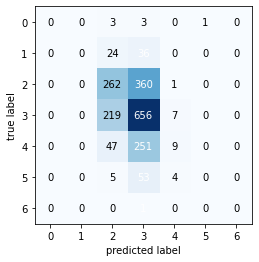

DecisionTreeClassifier
Accuracy 61.019999999999996 %
f1 score:  0.6101956745623069


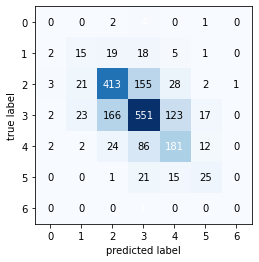

RandomForestClassifier
Accuracy 70.34 %
f1 score:  0.7033985581874357


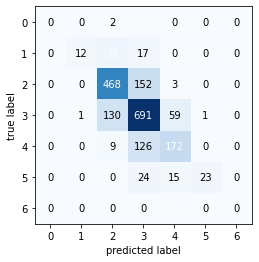

GradientBoostingClassifier
Accuracy 59.419999999999995 %
f1 score:  0.5942327497425335


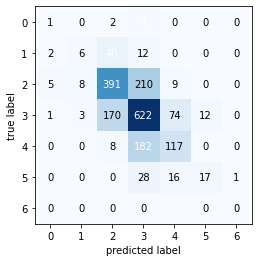

In [18]:
for name, model in model_dict.items():
    print(name)
    y_pred, model = run_model(model);

### **Conclusion:**

* RandomForestClassifier model has the highest accuracy and f1 score
* Accuracy : 70.34% 
* f1 score : 0.70